In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from seaborn import set_style
import kagglehub
from sklearn.linear_model import LogisticRegression
set_style("whitegrid")

In [3]:
dst_stocks = pd.read_csv('DST_Finance_Stocks.csv')
weekend_stocks = pd.read_csv('Weekends_Finance_Stocks.csv')

In [33]:
dst_stocks['return'] = np.abs((dst_stocks['mon_close']-dst_stocks['fri_close'])/dst_stocks['fri_close'])
weekend_stocks['return'] = np.abs((weekend_stocks['mon_close']-weekend_stocks['fri_close'])/weekend_stocks['fri_close'])
dst_stocks['mon_range'] = dst_stocks['mon_high']-dst_stocks['mon_low']
dst_stocks['fri_range'] = dst_stocks['fri_high']-dst_stocks['fri_low']
weekend_stocks['mon_range'] = weekend_stocks['mon_high']-weekend_stocks['mon_low']
weekend_stocks['fri_range'] = weekend_stocks['fri_high']-weekend_stocks['fri_low']
dst_stocks['y'] = 1
weekend_stocks['y'] = 0
fit_input = pd.DataFrame()
fit_input['X']=pd.concat([dst_stocks['return'],weekend_stocks['return']])
fit_input['y'] = pd.concat([dst_stocks['y'],weekend_stocks['y']])
fit_input = fit_input.sample(frac=1).reset_index()
fit_input

,index,X,y
0,354704,0.011834,0
1,323520,0.004787,0
2,1200,0.022540,0
3,353848,0.003147,0
4,262783,0.024194,0
...,...,...,...
539172,156829,0.003175,0
539173,168544,0.000000,0
539174,168377,0.015130,0
539175,112,0.000000,1


In [26]:
log_reg = LogisticRegression(penalty=None)
X = fit_input[['X']].values
y = fit_input['y'].values
log_reg.fit(X,y)
print(f'sklearn obtains the fit m = {log_reg.coef_[0][0]} and b = { log_reg.intercept_[0]}')

sklearn obtains the fit m = -0.09660177658697883 and b = -3.08839306529518


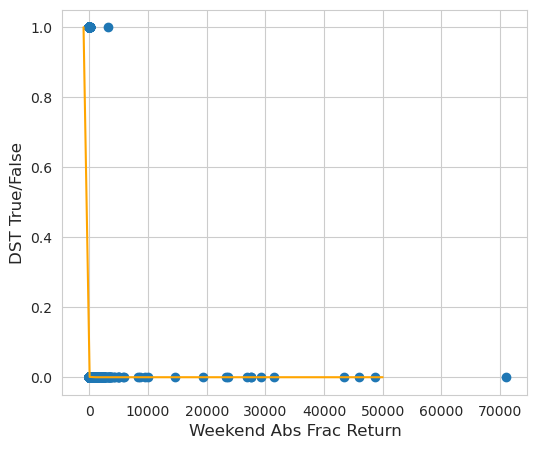

In [29]:
plt.figure(figsize=(6,5))

plt.scatter(X, y)

plt.plot(np.linspace(-1000,50000), log_reg.predict_proba(np.linspace(-1000,50000).reshape(-1,1))[:,1], color = 'orange')
#plt.plot(np.linspace(7,13), my_log_reg.predict_proba(np.linspace(7,13).reshape(-1,1)), c = 'k')

plt.xlabel("Weekend Abs Frac Return", fontsize=12)
plt.ylabel("DST True/False", fontsize=12)
plt.show()

In [35]:
multivariable_fit_input = pd.DataFrame()
multivariable_fit_input['y'] = pd.concat([dst_stocks['y'],weekend_stocks['y']])
multivariable_fit_input['abs_frac_return'] = pd.concat([dst_stocks['return'],weekend_stocks['return']])
multivariable_fit_input['mon_volume'] = pd.concat([dst_stocks['mon_volume'],weekend_stocks['mon_volume']])
multivariable_fit_input['fri_volume'] = pd.concat([dst_stocks['fri_volume'],weekend_stocks['fri_volume']])
multivariable_fit_input['mon_range'] = pd.concat([dst_stocks['mon_range'],weekend_stocks['mon_range']])
multivariable_fit_input['fri_range'] = pd.concat([dst_stocks['fri_range'],weekend_stocks['fri_range']])
multivariable_fit_input = multivariable_fit_input.sample(frac=1).reset_index()

In [42]:
#X = np.concatenate([multivariable_fit_input[['abs_frac_return']].values,multivariable_fit_input[['mon_volume']].values,multivariable_fit_input[['fri_volume']].values,multivariable_fit_input[['mon_range']].values,multivariable_fit_input[['fri_range']].values],axis=-1)
X = np.concatenate([multivariable_fit_input[['abs_frac_return']].values,multivariable_fit_input[['mon_volume']].values],axis=-1)
y = multivariable_fit_input['y'].values

In [43]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

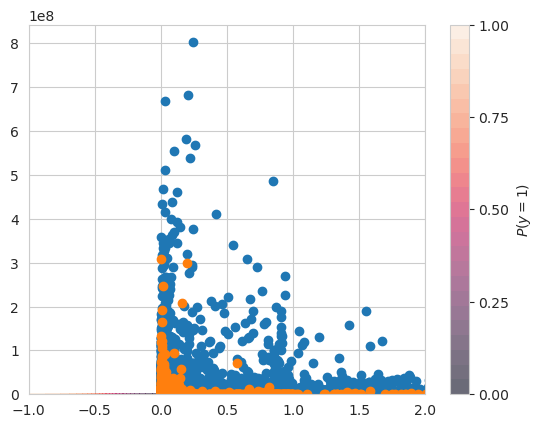

In [69]:
plt.clf()
xx, yy = np.mgrid[-1:2:0.01, 0:1000000:1000]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

contour = plt.contourf(xx, yy, probs, 25, alpha = 0.6,
                      vmin=0, vmax=1)
                      
ax_c = plt.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
plt.xlim([-1,2])

plt.scatter(weekend_stocks['return'],weekend_stocks['mon_volume'])
plt.scatter(dst_stocks['return'],dst_stocks['mon_volume'])
#plt.scatter(X1[:,0],X1[:,1])

plt.show()